In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import dandelion as ddl
sc.logging.print_header()
warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')
import tools

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.4 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3


### Read in the transcriptome file

In [2]:
# read in the transcriptome file
adata = sc.read_h5ad('cpdb/rna.h5ad')
adata

AnnData object with n_obs × n_vars = 174406 × 21233
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'sample_id', 'fine_clustering_mono', 'cell_type'
    var: 'index', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [7]:
adata.var.set_index('index', inplace = True)

In [25]:
adata.obs['test'] = [a +'_' + b for a,b in zip(adata.obs['treatment_group_1'], adata.obs['fine_clustering_mono'])]

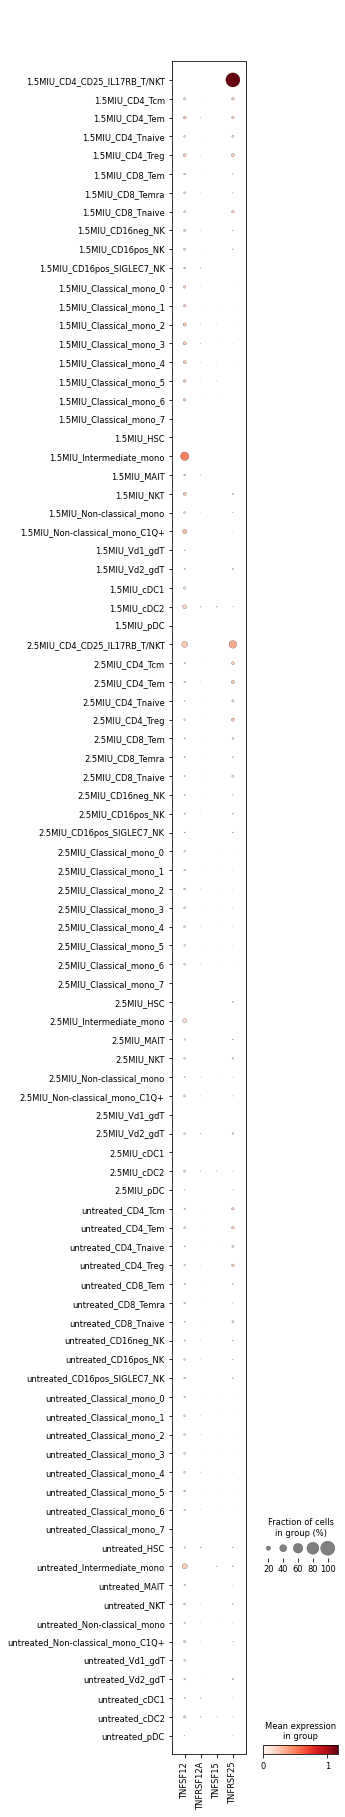

In [21]:
sc.pl.dotplot(adata, ['TNFSF12', 'TNFRSF12A', 'TNFSF15', 'TNFRSF25'], groupby = 'test')

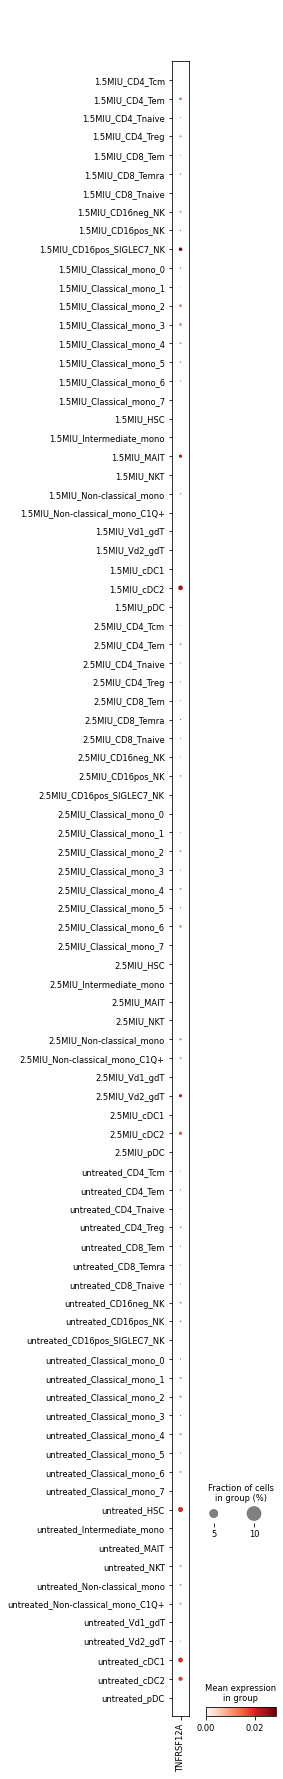

In [18]:
sc.pl.dotplot(adata[~(adata.obs['fine_clustering_mono'] == 'CD4_CD25_IL17RB_T/NKT')], ['TNFRSF12A'], groupby = 'test')

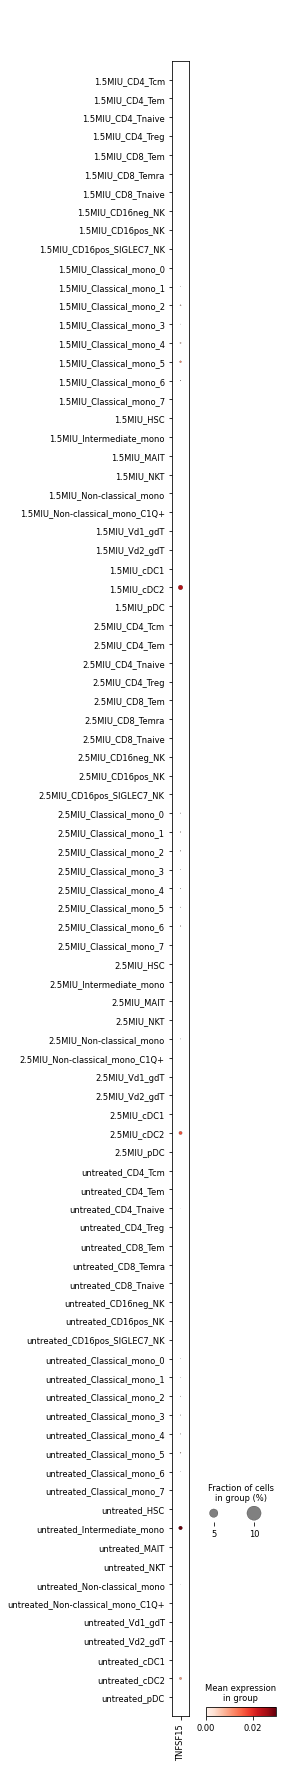

In [20]:
sc.pl.dotplot(adata[~(adata.obs['fine_clustering_mono'] == 'CD4_CD25_IL17RB_T/NKT')], ['TNFSF15'], groupby = 'test')

Trying to set attribute `.obs` of view, copying.
... storing 'test' as categorical


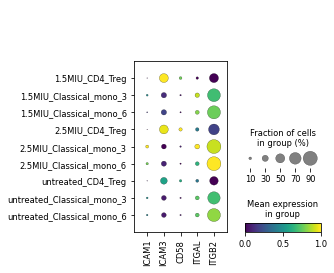

In [32]:
sc.pl.dotplot(adata[adata.obs['fine_clustering_mono'].isin(['CD4_Treg', 'Classical_mono_3', 'Classical_mono_6'])], ['ICAM1', 'ICAM3', 'CD58', 'ITGAL', 'ITGB2'], groupby = 'test', standard_scale = 'var', color_map = 'viridis')

In [6]:
# read in the transcriptome file
adata = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
pd.crosstab(adata.obs['sample_id'], adata.obs['fine_clustering'])

fine_clustering,B_naive,B_non-switched_memory,B_switched_memory,CD4_CD25_IL17RB_T/NKT,CD4_Tcm,CD4_Tem,CD4_Tnaive,CD4_Treg,CD8_Tem,CD8_Temra,...,Non-classical_mono,Non-classical_mono_C1Q+,Plasmablast,Proliferating_lymphocyte,Vd1_gdT,Vd2_gdT,cDC1,cDC2,doublets,pDC
sample_id,,,,,,,,,,,,,,,,,,,,,
Sample_Fq1,72,31,20,0,592,61,368,64,248,523,...,1221,66,3,55,3,131,11,215,819,11
Sample_Fq2,117,38,23,0,516,49,319,50,113,180,...,781,45,38,52,2,68,19,142,590,10
Sample_Fq3,320,155,85,0,775,96,460,54,471,1654,...,129,4,32,31,14,45,0,74,269,30
Sample_Fq4,108,24,22,1,721,80,606,178,163,621,...,200,19,12,142,4,5,5,115,364,0
Sample_Fq5,52,35,4,0,101,10,44,2,166,309,...,132,5,2,4,8,3,9,163,139,28
Sample_Fq6,122,37,14,0,219,15,247,50,138,376,...,485,27,5,164,11,1,0,109,382,13
Sample_Fq7,101,34,15,0,400,34,171,18,615,1123,...,318,7,5,10,16,35,2,53,439,1
Sample_Fq8,78,22,10,0,371,31,138,52,703,1561,...,380,37,10,219,13,48,1,54,629,0
Sample_Fq9,194,62,25,0,759,85,378,51,278,178,...,300,22,8,26,6,14,6,121,299,27


In [8]:
pd.crosstab(adata.obs['sample_id'], adata.obs['fine_clustering']).to_csv('h5ad/cell_counts.csv')